In [1]:
import os, sys
from scipy.integrate import solve_ivp

In [2]:
import numpy as np
from tqdm import tqdm

In [3]:
import matplotlib.pyplot as plt

In [4]:
cwd = os.getcwd()
cwd_ujoin = cwd.split("\\")[:-2]
basedir = "\\".join(cwd_ujoin)
sys.path.append(basedir)

In [5]:
from attitude.rigid_body import attitude_rate

In [6]:
def qd_cost(xi, xt, u, Q, R):
    return (xt-xi).T@Q@(xt-xi) + u.T@R@u

In [7]:
def mpc_cost(xi, xt, u, Q, R, x_horizon, u_horizon):
    pass

In [8]:
def optimize():
    pass

In [9]:
def xdot(x, u, I, **params):
    qdot, wdot = attitude_rate(x[:4], x[4:], u, I)
    return np.hstack((qdot, wdot))

In [10]:
def predict(x, u, I, start, end, **solver_opts):
    fx = lambda t, y: xdot(y, u, I)
    sol = solve_ivp(fx, [start, end], x, rtol = 1e-5, **solver_opts)
    return sol.y.flatten()

In [11]:
q0 = [1, 0, 0, 0]
qt = [0, 1, 0, 0]

In [12]:
w0 = [1.0, 0.5, 1.0]
wt = [0, 0, 0]

In [13]:
x0 = np.hstack((q0, w0))
u0 = np.array([0.0, 0.0, 0.0])
xt = np.hstack((qt, wt))

In [14]:
t_start = 0
t_end = 100
dt = 0.5
t_vec = np.arange(t_start, t_end + dt, dt)

In [15]:
I = np.diag([10.0, 10.0, 100.0])

In [16]:
x = x0
u = u0
Q = np.eye(7)
R = np.eye(3)
x_history = np.zeros((len(t_vec), len(x)))
cost_history = np.zeros((len(t_vec, )))
u_history = np.zeros((len(t_vec), len(u)))
solver_opts = dict(t_eval=[0])
Kp, Kd, Ki = 4.0, 0.0, 0.1
K = np.array([
    [1, 0, 0],
    [0, 0.5, 0],
    [0, 0, 50]
])
errp = 0
errn = errp
err_total = 0

for idx, t in enumerate(t_vec):
    x_history[idx, :] = x
    u_history[idx, :] = u
    start = t
    end = t + dt
    solver_opts['t_eval'] = [end]
    xnew = predict(x, u, I, start, end, **solver_opts)
    errn = xnew[4:] - xt[4:]
    err_total = err_total + errn*dt
    # u = (Kp*errn + Kd*(errn - errp)/dt + Ki*err_total)
    u = -K@xnew[4:]
    # cost = qd_cost(xnew, xt, u, Q, R)
    x = xnew
    errp = errn
    # cost_history[idx] = cost

In [17]:
x_history = np.array(x_history)

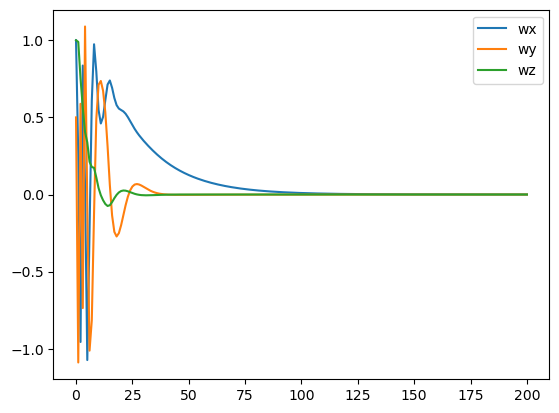

In [18]:
plt.plot(x_history[:, 4:])
plt.legend(['wx', 'wy', 'wz'])

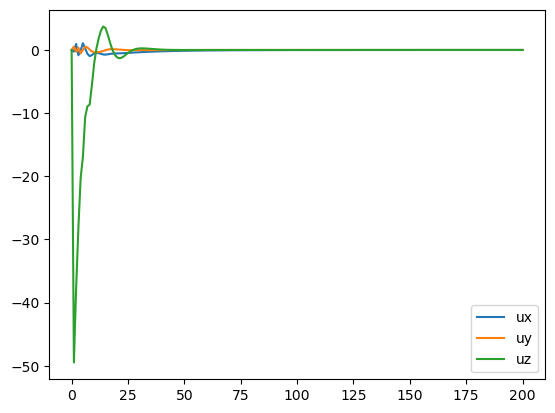

In [19]:
plt.plot(u_history)
plt.legend(['ux', 'uy', 'uz'])